In [51]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

import DarkNews as dn

# Our module
import nuflux

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
#Circular detector (R = 10 km = 10 000 m = 1 000 000 cm) with 1 TeV max energy and 380 GeV average energy (arbitrary); shoudl output some acceptance
mdb = nuflux.fluxMC.MuonDecay()

df = mdb.simulate_decays(
                            pmin = 0, #minimum momentum
                            pmax = 3e3,  #maximum momentum
                            beam_p0 = 1e3, # average momentum (GeV)
                            beam_dpop = 0.1,# little beam spread
                            Rpm=0.5, #Fraction of total muons that are plus (or minus?)
                            NINT=10, #for MC integration
                            NINT_warmup=10,
                            NEVAL=1e5,
                            NEVAL_warmup=1e4,
                            )

_= mdb.propagate_to_detector(
                            Racc = 1e6,
                            circular = True,
                            det_height = 10e2, #10 m in cm
                            Ddetector =[300, 0]) #arbitrary dimensions for circ detect SHEET at x = 0, y=0, z = Racc ; [0] is radius of detector and [1] is the hollow hole in the middle 
_ = mdb.flux_in_detector(circular = True, NBINS=50)

print("If decay uniform, then acceptance = {}".format(1 / 2 /np.pi * np.arccos(1e6 / (1e6 + 3e2))))

187575
Detector acceptance: 0.003970376832326438  for nue, and 0.003976196051135801 for numu.
If decay uniform, then acceptance = 0.003897996789941537


Text(0, 0.5, 'I have 0 idea! smth WITH weights?')

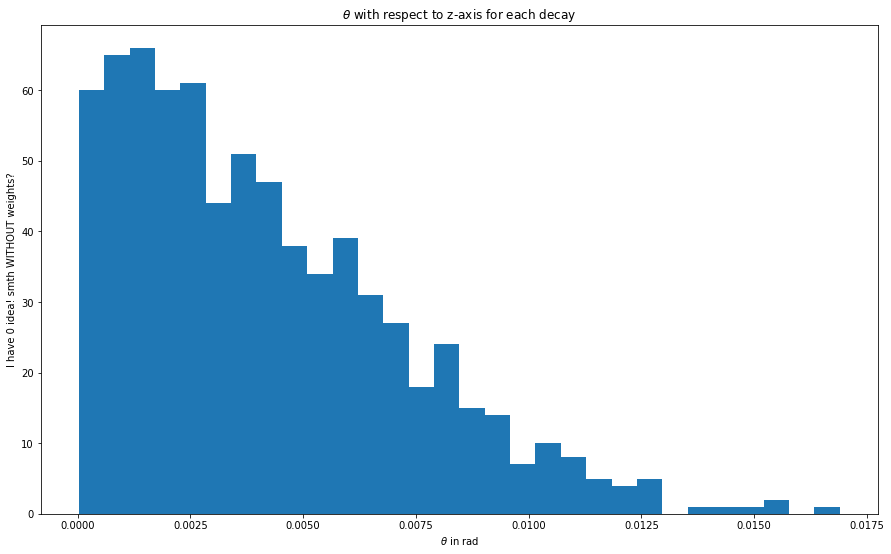

<Figure size 432x288 with 0 Axes>

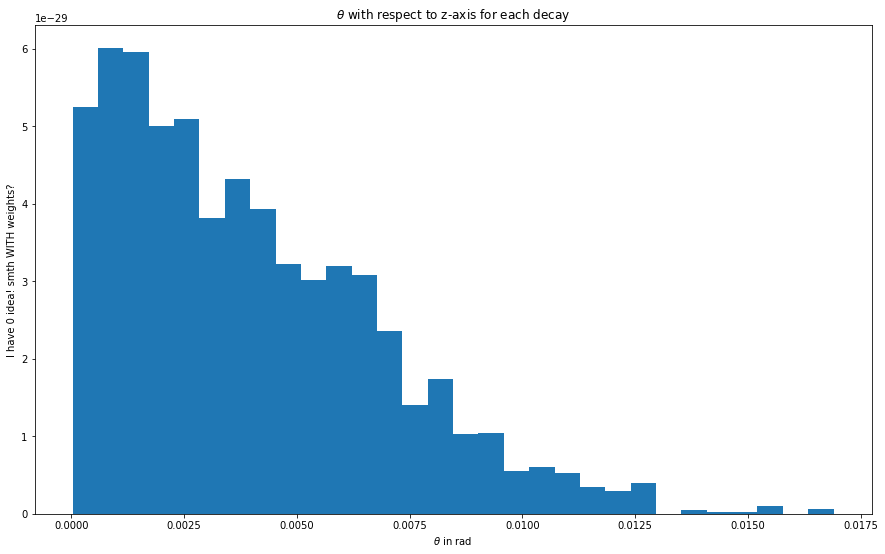

In [54]:
plt.figure(figsize = (15,9))
plt.hist(np.arccos(dn.Cfourvec.get_cosTheta(mdb.pnumu[mdb.mask_numu])), bins = 30)
plt.title(r"$\theta$ with respect to z-axis for each decay")
plt.xlabel(r"$\theta$ in rad")
plt.ylabel("I have 0 idea! smth WITHOUT weights?")
plt.figure(2)
plt.figure(figsize = (15,9))
plt.hist(np.arccos(dn.Cfourvec.get_cosTheta(mdb.pnumu[mdb.mask_numu])), bins = 30, weights = mdb.wnumu_ND)
plt.title(r"$\theta$ with respect to z-axis for each decay")
plt.xlabel(r"$\theta$ in rad")
plt.ylabel("I have 0 idea! smth WITH weights?")

Text(0, 0.5, 'I have 0 idea! smth WITH weights?')

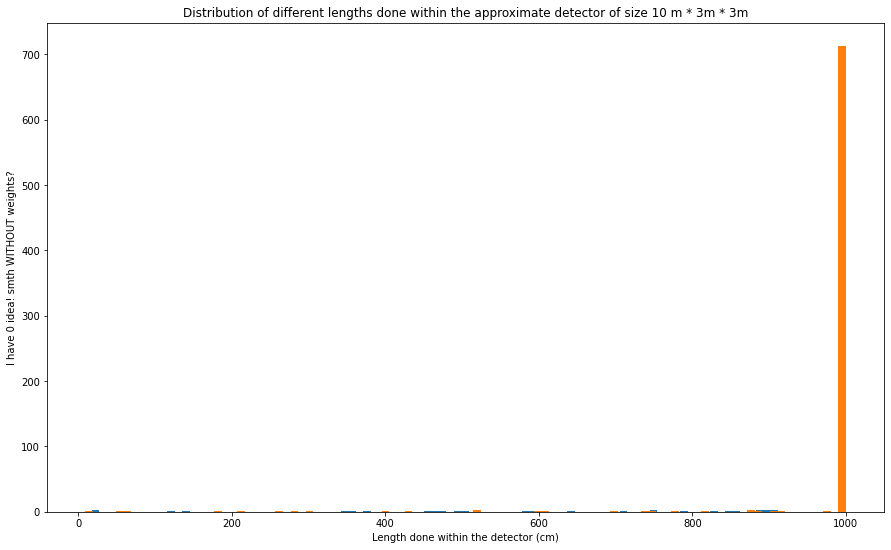

<Figure size 432x288 with 0 Axes>

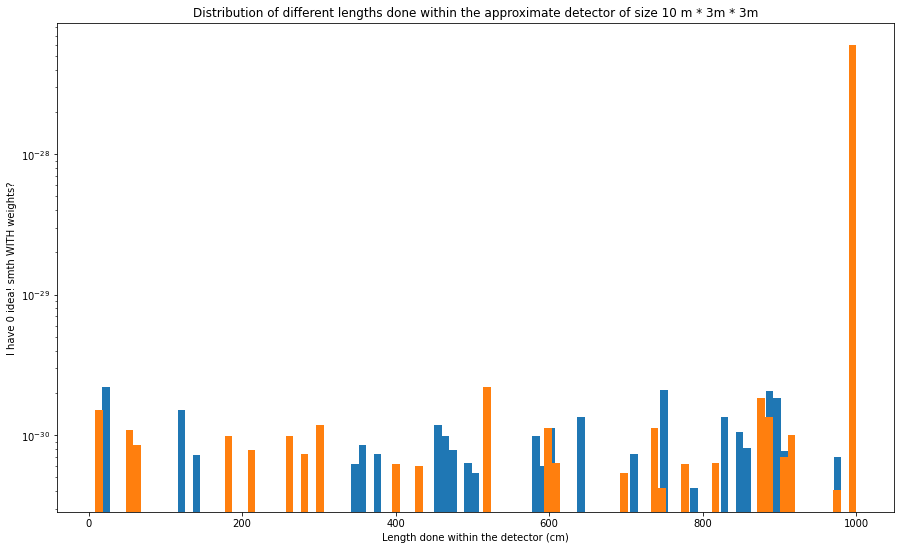

In [63]:
#weights? self.wnumu_ND and self.wnue_ND (already masked), maybe multiply by self.N_mu = 1e18?
plt.figure(figsize = (15,9))
plt.hist(mdb.heights[:,1][mdb.mask_numu], bins = 100)
plt.hist(mdb.heights[:,2][mdb.mask_nue], bins=100)
plt.title("Distribution of different lengths done within the approximate detector of size 10 m * 3m * 3m")
plt.xlabel("Length done within the detector (cm)")
plt.ylabel("I have 0 idea! smth WITHOUT weights?")
plt.figure(2)
plt.figure(figsize = (15,9))
plt.hist(mdb.heights[:,1][mdb.mask_numu], bins = 100, weights = mdb.wnumu_ND)
plt.yscale("log")
plt.hist(mdb.heights[:,2][mdb.mask_nue], bins=100, weights = mdb.wnue_ND)
plt.title("Distribution of different lengths done within the approximate detector of size 10 m * 3m * 3m")
plt.xlabel("Length done within the detector (cm)")
plt.ylabel("I have 0 idea! smth WITH weights?")

Text(0.5, 0, '$\\Phi$ (rad)')

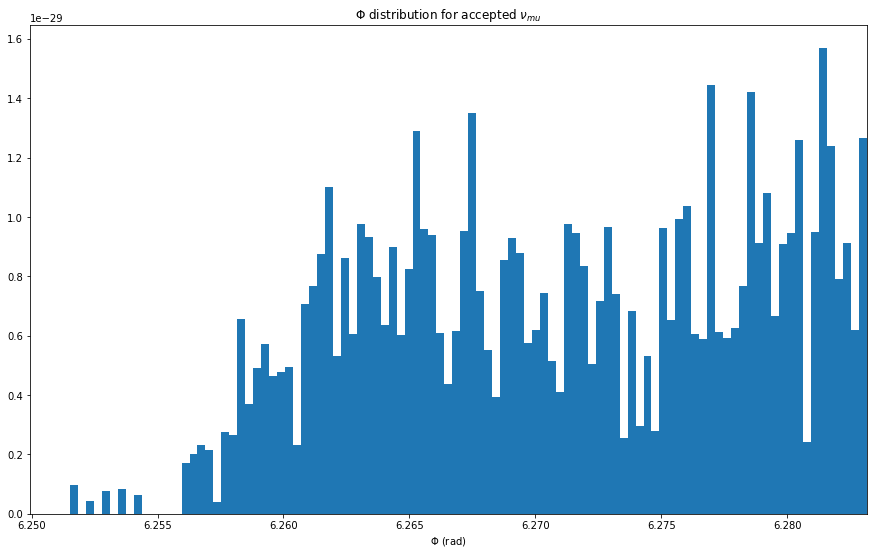

In [56]:
plt.figure(figsize = (15,9))
plt.hist(mdb.delta[mdb.mask_numu], bins = 100, weights = mdb.wnumu_ND)
plt.xlim(right=2*np.pi)
plt.title(r"$\Phi$ distribution for accepted $\nu_{mu}$")
plt.xlabel(r"$\Phi$ (rad)")

(array([ 30.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 709.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

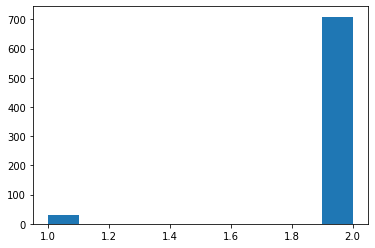

In [59]:
plt.hist(mdb.cases[:,1][mdb.mask_numu])

(array([18805., 18913., 18826., 18713., 18670., 18593., 18648., 18602.,
        19109., 18696.]),
 array([3.70637878e-05, 6.28349252e-01, 1.25666144e+00, 1.88497363e+00,
        2.51328582e+00, 3.14159800e+00, 3.76991019e+00, 4.39822238e+00,
        5.02653457e+00, 5.65484676e+00, 6.28315895e+00]),
 <BarContainer object of 10 artists>)

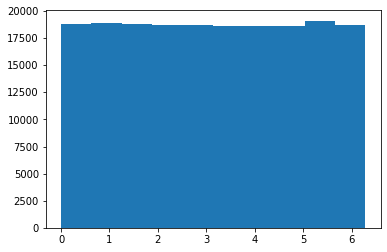

In [64]:
plt.hist(mdb.delta)

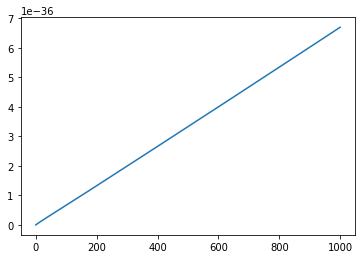

In [4]:
from scipy import interpolate

log10E,sigmae,sigmamu,_,sigmaebar,sigmamubar,_ = np.genfromtxt('xsecs/XCC.dat',unpack=True)
exs = 10**(log10E)
sigmanue = interpolate.interp1d(exs,sigmae*exs*1e-38,bounds_error=False,fill_value=0.0)
sigmanuebar = interpolate.interp1d(exs,sigmaebar*exs*1e-38,bounds_error=False,fill_value=0.0)
sigmanumu = interpolate.interp1d(exs,sigmamu*exs*1e-38,bounds_error=False,fill_value=0.0)
sigmanumubar = interpolate.interp1d(exs,sigmamubar*exs*1e-38,bounds_error=False,fill_value=0.0)

plt.plot(exs, sigmanue(exs))

In [6]:
Nmu = 1e18
rho = 1.5 #g/cm**3
mn = 939e6 *1.6e-19/(3e8)**2 * 10**3 #g
Ntargets= rho /mn #1/cm**3
h= 10e2 #cm
deltaE_nue = mdb.Enue_ND[1] -mdb.Enue_ND[0]
deltaE_numu = mdb.Enumu_ND[1] - mdb.Enumu_ND[0]
epsilon_nue = mdb.flux_nue_ND_p/np.sum(mdb.flux_nue_ND_p) / deltaE_nue
epsilon_numu = mdb.flux_numu_ND_p/np.sum(mdb.flux_numu_ND_p) / deltaE_numu

dNnue_dE = epsilon_nue * Ntargets*Nmu * h * sigmanue(mdb.Enue_ND)
dNnumu_dE= epsilon_numu * Ntargets *h*Nmu * sigmanumubar(mdb.Enumu_ND)

Text(0.5, 1.0, 'Events')

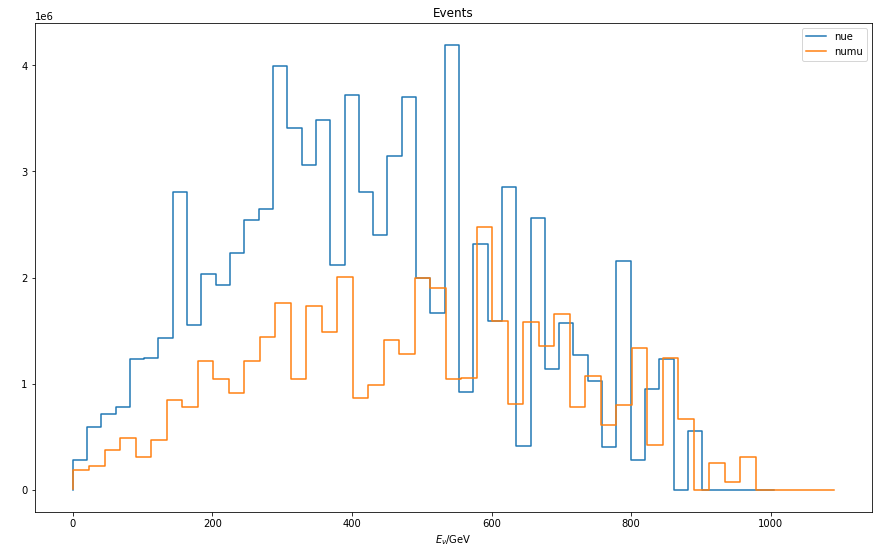

In [7]:
fig, ax = plt.subplots(figsize=(15,9))

ax.step(mdb.Enue_ND,dNnue_dE, label="nue")
ax.step(mdb.Enumu_ND,dNnumu_dE, label="numu")

ax.set_ylabel(" ")
ax.set_xlabel(r'$E_{\nu}/$GeV')
ax.legend()
ax.set_title("Events")

In [8]:
print(sum(dNnue_dE) * (mdb.Enue_ND[1] - mdb.Enue_ND[0]))
print(sum(dNnumu_dE) * (mdb.Enue_ND[1] - mdb.Enue_ND[0]))

1699595869.842988
923736335.5251577
